In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

In [2]:
df = pd.read_csv('Resources/Data/data.csv')
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
df

,IMDB ID,Title,Director,Actor,Year,Box Office,Rating,IMDB Rating,IMDB Votes,Metascore
0,tt1375666,Inception,Christopher Nolan,Leonardo DiCaprio,2010,"$292,568,851",PG-13,8.8,"1,953,512",74.0
1,tt1345836,The Dark Knight Rises,Christopher Nolan,Christian Bale,2012,"$448,130,642",PG-13,8.4,"1,454,342",78.0
2,tt0816692,Interstellar,Christopher Nolan,Ellen Burstyn,2014,"$158,737,441",PG-13,8.6,"1,413,039",74.0
3,tt1853728,Django Unchained,Quentin Tarantino,Jamie Foxx,2012,"$162,804,648",R,8.4,"1,282,957",81.0
4,tt0848228,The Avengers,Joss Whedon,Robert Downey Jr.,2012,"$623,279,547",PG-13,8.0,"1,225,316",69.0
...,...,...,...,...,...,...,...,...,...,...
1345,tt1316616,There Be Dragons,Roland Joffé,Charlie Cox,2011,"$1,065,439",PG-13,5.8,"4,453",33.0
1346,tt1566501,For Greater Glory: The True Story of Cristiada,Dean Wright,Mauricio Kuri,2012,"$5,669,081",R,6.6,"4,415",35.0
1347,tt4939066,Battle for Incheon: Operation Chromite,John H. Lee,Liam Neeson,2016,"$904,216",Not Rated,6.2,"4,305",50.0
1348,tt1496005,The Tree,Julie Bertuccelli,Charlotte Gainsbourg,2010,"$69,236",Not Rated,6.6,"4,279",58.0


In [3]:
df.dtypes

IMDB ID         object
Title           object
Director        object
Actor           object
Year            object
Box Office      object
Rating          object
IMDB Rating    float64
IMDB Votes      object
Metascore      float64
dtype: object

## Things to Cleanup
* Year: remove hyphenated years
* Box Office: remove dollar signs and commas
* IMDB Votes: remove commas

## Year Cleanup

### Update data type for Year col

In [4]:
df = df.astype({'Year': int})
df.dtypes

IMDB ID         object
Title           object
Director        object
Actor           object
Year             int32
Box Office      object
Rating          object
IMDB Rating    float64
IMDB Votes      object
Metascore      float64
dtype: object

### Find rows outside of 2010s range

In [5]:
index_list = []

for index, row in df.iterrows():
    year = row.Year
    if year < 2010 or year >= 2019:
        index_list.append(index)
print(index_list)

[176, 204, 262, 344, 610, 612, 637, 815, 827, 904, 955, 1026, 1135, 1162, 1196, 1198, 1215, 1295]


In [7]:
df.drop(index_list, inplace=True)
df.head()

KeyError: '[ 176  204  262  344  610  612  637  815  827  904  955 1026 1135 1162\n 1196 1198 1215 1295] not found in axis'

## Box Office Cleanup

In [8]:
df['Box Office'] = df['Box Office'].apply(lambda x: float(x.translate({ord('$'): None, ord(','): None})))
df.head()

,IMDB ID,Title,Director,Actor,Year,Box Office,Rating,IMDB Rating,IMDB Votes,Metascore
0,tt1375666,Inception,Christopher Nolan,Leonardo DiCaprio,2010,292568851.0,PG-13,8.8,"1,953,512",74.0
1,tt1345836,The Dark Knight Rises,Christopher Nolan,Christian Bale,2012,448130642.0,PG-13,8.4,"1,454,342",78.0
2,tt0816692,Interstellar,Christopher Nolan,Ellen Burstyn,2014,158737441.0,PG-13,8.6,"1,413,039",74.0
3,tt1853728,Django Unchained,Quentin Tarantino,Jamie Foxx,2012,162804648.0,R,8.4,"1,282,957",81.0
4,tt0848228,The Avengers,Joss Whedon,Robert Downey Jr.,2012,623279547.0,PG-13,8.0,"1,225,316",69.0


## IMDB Votes Cleanup

In [9]:
df['IMDB Votes'] = df['IMDB Votes'].apply(lambda x: float(x.translate({ord(','): None})))
df.head()

,IMDB ID,Title,Director,Actor,Year,Box Office,Rating,IMDB Rating,IMDB Votes,Metascore
0,tt1375666,Inception,Christopher Nolan,Leonardo DiCaprio,2010,292568851.0,PG-13,8.8,1953512.0,74.0
1,tt1345836,The Dark Knight Rises,Christopher Nolan,Christian Bale,2012,448130642.0,PG-13,8.4,1454342.0,78.0
2,tt0816692,Interstellar,Christopher Nolan,Ellen Burstyn,2014,158737441.0,PG-13,8.6,1413039.0,74.0
3,tt1853728,Django Unchained,Quentin Tarantino,Jamie Foxx,2012,162804648.0,R,8.4,1282957.0,81.0
4,tt0848228,The Avengers,Joss Whedon,Robert Downey Jr.,2012,623279547.0,PG-13,8.0,1225316.0,69.0


## Verify data types

In [10]:
df.dtypes

IMDB ID         object
Title           object
Director        object
Actor           object
Year             int32
Box Office     float64
Rating          object
IMDB Rating    float64
IMDB Votes     float64
Metascore      float64
dtype: object

## Save to csv

In [11]:
df.to_csv('Resources/Data/clean_data.csv')

In [34]:
from matplotlib import pyplot as plt

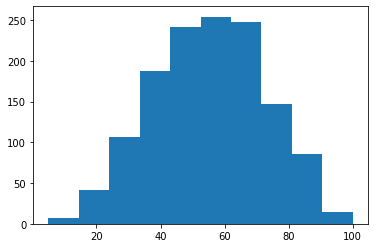

In [35]:
plt.hist(df['Metascore'])
plt.show()

In [36]:
df.describe()

,Year,Box Office,IMDB Rating,IMDB Votes,Metascore
count,1332.000000,1.332000e+03,1332.000000,1.332000e+03,1332.000000
mean,2012.882883,4.760412e+07,6.422598,1.258782e+05,55.087087
std,2.147060,8.156061e+07,0.891941,1.772323e+05,17.251398
min,2010.000000,4.110000e+02,2.000000,4.223000e+03,5.000000
25%,2011.000000,8.897020e+05,5.900000,2.177075e+04,42.000000
50%,2013.000000,1.614597e+07,6.400000,6.139150e+04,55.000000
75%,2014.000000,5.765722e+07,7.100000,1.523252e+05,68.000000
max,2018.000000,9.366586e+08,8.800000,1.953512e+06,100.000000
